In [205]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [151]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [152]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [155]:
classes=["airplane","cars","bird","cat","deer","dogs","frogs","horses","ships","trucks"]

In [157]:
def print_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

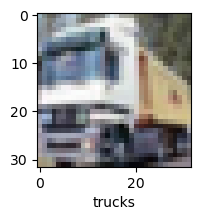

In [159]:
print_sample(x_train, y_train, 1)

<h3> Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range</h3>

In [162]:
x_test=x_test/255.0
x_train=x_train/255.0

In [164]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3049 - loss: 1.9291
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4217 - loss: 1.6483
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4537 - loss: 1.5484
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4792 - loss: 1.4873
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4956 - loss: 1.4281


In [166]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [168]:
print("classification Report: \n",classification_report(y_test,y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.56      0.54      1000
           1       0.65      0.59      0.62      1000
           2       0.38      0.32      0.35      1000
           3       0.34      0.36      0.35      1000
           4       0.32      0.60      0.42      1000
           5       0.48      0.27      0.35      1000
           6       0.51      0.52      0.52      1000
           7       0.69      0.38      0.49      1000
           8       0.56      0.68      0.62      1000
           9       0.61      0.52      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [180]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [182]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [186]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3623 - loss: 1.7419
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5979 - loss: 1.1512
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6559 - loss: 0.9923
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6864 - loss: 0.8958
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7141 - loss: 0.8172
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7350 - loss: 0.7656
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7531 - loss: 0.7119
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7721 - loss: 0.6671
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7810 - loss: 0.6332
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7897 - loss: 0.6028


In [187]:
cnn.evaluate(x_test,y_test)

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential_6, built=True>>

In [193]:
y_Pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[3.15255225e-02, 3.88167650e-02, 1.09920248e-01, 4.14846510e-01,
        4.60180454e-02, 1.40229806e-01, 1.49054140e-01, 3.45920096e-03,
        6.24042004e-02, 3.72563628e-03],
       [9.29308906e-02, 1.66948393e-01, 3.83859151e-03, 3.40122636e-03,
        2.98069138e-03, 6.92030240e-04, 4.64523124e-04, 7.38843810e-04,
        3.31667960e-01, 3.96336794e-01],
       [3.43791306e-01, 1.60963863e-01, 5.48118446e-03, 2.96068355e-03,
        5.58699947e-03, 1.83202547e-03, 7.62619820e-05, 2.50481954e-03,
        3.60552371e-01, 1.16250455e-01],
       [4.16763693e-01, 2.17728782e-02, 6.31934926e-02, 1.61621477e-02,
        7.42207989e-02, 7.33163394e-03, 5.39089029e-04, 2.04796176e-02,
        3.64809096e-01, 1.47275142e-02],
       [6.06488390e-03, 1.69774343e-03, 6.68825507e-02, 1.90768857e-02,
        7.89039791e-01, 1.97784360e-02, 8.04989338e-02, 1.13401962e-02,
        4.90237167e-03, 7.18238007e-04]], dtype=float32)

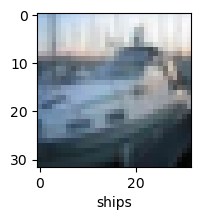

In [195]:
y_classes=[np.argmax(element) for element in y_pred]
print_sample(x_test,y_test,2)

In [199]:
classes[y_classes[2]]

'ships'

In [203]:
print("classification Report: \n",classification_report(y_test,y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.56      0.54      1000
           1       0.65      0.59      0.62      1000
           2       0.38      0.32      0.35      1000
           3       0.34      0.36      0.35      1000
           4       0.32      0.60      0.42      1000
           5       0.48      0.27      0.35      1000
           6       0.51      0.52      0.52      1000
           7       0.69      0.38      0.49      1000
           8       0.56      0.68      0.62      1000
           9       0.61      0.52      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000

